# Machine Learning: A Primer for Radiologists

## Contents

* Machine Learning Basics
* Machine Learning Workflow
* Commonly Used Models
* Notes and Tips
* Applications in Radiology

### Machine Learning Basics
* Unsupervised and Supervised
* Bias and Variance
* Model Specification and Training
* Training and Testing
* Example: Linear Regression
  * Input and Output
  * Parameter Estimation
  * Training and Testing

#### Unsupervised and Supervised Learning

| Unsupervised | Supervised |
| :-------------: | :-------------:|
| Aims to "summarize" data  | Aims to "learn" a function or parameters of a function as a map between input data and output/prediction |
| Methods to reduce dimensionality of data | Methods to train a system for prediction |
| Clustering, Compression, Association Rules | Regression |

#### Supervised Learning
* One of the most well known cases - linear regression
* Task is to "learn" the values of a linear model that best fits the data

<br>
<br>
 <center> $$ Y = mx + b $$ </center>
<br>
<br>

* Our goal here is to estimate what values of $m$ and $b$ best fit the data

#### Supervised Learning

<table>
  <tr>
    <td> Classification by nearest neighbor voting </td>
    <th rowspan="2" style="width:40%"><img src="assets/images/knn_regression.png" alt='knn_regression'></th>
  </tr>
  <tr>
    <td> A function of 2-dimensional input space is "learned" based on the majority voting of the 15 nearest neighbors in the dataset. <p> $$Y(x_{1}, x_{2}) = \frac{1}{k} \sum_{x_{i} \in N_{k}(k)} y_{i}$$ </p> </td>
  </tr>
</table>


<footer id="attribution" style="float:left; color:#999; background:#fff;">
<a href="#/2">Back to top</a>
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 2, Page 7</p>
</footer>

#### Unsupervised and Supervised Learning
<table>
  <tr>
    <td>These methods are not exclusive of each other and can compliment each other!</td>
    <th rowspan="2" style="width:55%"><img src="assets/images/gene_expression_regression.jpg" alt='gene_express'></th>
  </tr>
  <tr>
    <td>Example: reducing gene expression data to summarize the most important gene expression patterns of a dataset (unsupervised), which is then used to estimate survival (supervised).</td>
  </tr>
</table>


<footer id="attribution" style="float:left; color:#999; background:#fff;">
<a href="#/2">Back to top</a>
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 16 Page 29</p>
</footer>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

x = np.linspace(0, 500.0, num=50)
x += abs(x.min()) + 1.0
y = np.log(x) + np.random.normal(scale=0.25,size=(x.size,))

p_lin = np.polyfit(x, y, 1)
p_high = np.polyfit(x, y, 32)
p_lin_y = np.polyval(p_lin, x)
p_high_y = np.polyval(p_high, x)

/home/matt/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: RankWarning: Polyfit may be poorly conditioned


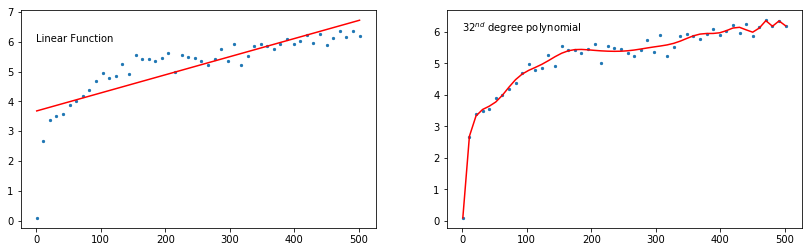

In [2]:
fig = plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(x, y, s=5)
plt.text(0.05, 6.0, 'Linear Function')
plt.plot(x, p_lin_y, color='r')

plt.subplot(122)
plt.scatter(x, y, s=5)
plt.plot(x, p_high_y, color='r')
plt.text(0.05, 6.0 , '$32^{ nd }$ degree polynomial')
fig.savefig(os.path.join('assets', 'images', 'bias_var.png'), bbox_inches='tight')
plt.show()

 <h2> <center> <left> High bias </left> vs  <right> high variance </right>  </center> </h2>

![pic](assets/images/bias_var.png)

In [3]:
def cost(predictions, ground_truth):
    total_cost = 0.0
    for i in range(len(predictions)):
        total_cost += (1.0 / 2.0) * (predictions[i] - ground_truth[i])**2.0
    
    total_cost /= float(len(predictions))
    return total_cost
    

def hypothesis_function(m, x, b):
    h = m * x + b
    return h

def gradients(m, b, x, ground_truth):
    m_gradient = 0.0
    b_gradient = 0.0
    
    predictions = []
    
    for i in range(len(x)):
        predictions.append(hypothesis_function(m, x[i], b))
    
    for i in range(len(x)):
        error = predictions[i] - ground_truth[i]
        m_gradient += error * x[i]
        b_gradient += error * 1.0
        
    m_gradient /= float(len(x))
    b_gradient /= float(len(x))
    
    return m_gradient, b_gradient

def update_parameters(m, b, m_gradient, b_gradient, alpha):
    m_updated = m - (m_gradient * alpha)
    b_updated = b - (b_gradient * alpha)
    
    return m_updated, b_updated


def run_gradient_descent(x, y, m_init, b_init, alpha=0.01, num_iteration=1500, tol=1e-4):
    
    m = m_init
    b = b_init
    
    m_vals = []
    b_vals = []
    costs = []
    
    for iteration_num in range(num_iteration):
        #save the current values of m and b
        m_vals.append(m)
        b_vals.append(b)
        
        #make our predictions
        predictions = []
        for i in range(len(x)):
            predictions.append(hypothesis_function(m, x[i], b))
        
        #compute the cost and save it
        current_cost = cost(predictions, y)
        costs.append(current_cost)
        
        if current_cost < tol: #check if we are done
            break
        else: 
            #compute the gradients
            m_grad, b_grad = gradients(m, b, x, y)
        
            #update parameters m and b
            m_new, b_new = update_parameters(m, b, m_grad, b_grad, alpha)
 
            #reset m and b
            m = m_new
            b = b_new
            
    return m_vals, b_vals, costs
        
        
    

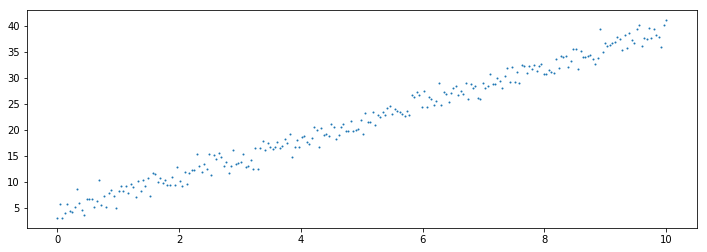

In [119]:
m_true = 3.5
b_true = 4.0
x = np.linspace(0, 10.0, num=250)
y = x * m_true + b_true + np.random.normal(scale=1.3,size=(x.size,))
fig = plt.figure(figsize=(12,4))
plt.scatter(x, y,s=1.0)
plt.show()

In [120]:
mv, bv, c = run_gradient_descent(x, y, -2.0, 30.0, num_iteration=5000)

In [121]:

# from ipywidgets import interact

# #fig = plt.figure(figsize=(9,6))

# @interact(index=(0, len(mv)-1, 10))
# def update_plot(index):
    
#     y_hat = mv[index] * x + bv[index]
    
#     fig = plt.figure(figsize=(9,6))
#     plt.scatter(x,y,s=1.0,c='blue')
#     plt.plot(x, y_hat, 'r')
#     plt.text(0.05, 30.0, r'y = {mv:.2f} x + {bv:.2f}'.format(mv=mv[index], bv=bv[index]))
#     plt.ylim(0.0, 45.0)
#     plt.show()
    

In [125]:

import plotly

idxs = range(0,len(mv), 500)

# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [0, 10], 'title': 'X'}
figure['layout']['yaxis'] = {'range':[0,45], 'title': 'Y'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 800
        }
    ],
    'plotlycommand': 'animate',
    'values': idxs,
    'visible': True
}
figure['layout']['width'] = '1000'

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 800, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 800}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': -1,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': '',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 800},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}




for idx in [idxs[0]]:
    y_hat = mv[idx] * x + bv[idx]
    
    data_dict = {'x':x,
                 'y':y_hat,
                 'name':'Model',
                 'line':dict(width=4)}
    
    figure['data'].append(data_dict)
    
figure['data'].append({'x':x, 'y':y,'mode':'markers','name':"Data",'marker':dict(color='green')})

    
#make frames
for idx in idxs:
    frame = {'data': [], 'name': str(idx)}
    
    y_hat = mv[idx] * x + bv[idx]
    
    data_dict = {'x':x,
                 'y':y_hat}
    
    frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [idx],
        {'frame': {'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 800}}
     ],
     'label': 'Iteration: {i} | {cmv:.2f}x + {cbv:.2f}'.format(cmv=mv[idx], cbv=bv[idx], i=idx),
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]




In [126]:
plotly.offline.init_notebook_mode(connected=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [127]:
plotly.offline.iplot(figure, show_link=False)